**Benchmark Datasets**

In [0]:
from sklearn import cluster, datasets
import numpy as np
n_samples = 1500 # Samples
#Noisy Circles
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

#Dataset to be clustered and reference solution
X,y=noisy_moons



 **Clustering Algorithms**

Algorithm 1: K-Means

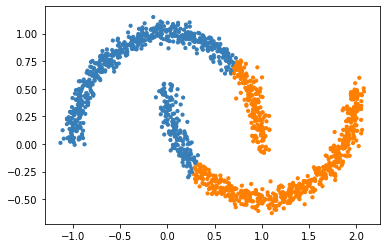

Adjusted Rand Index 0.24551267289719625
Mutual Information 0.18517507178162193
Silhouette Index 0.4906231123031042
Davis Bouldin Index 0.7799903081883995


In [0]:


###################################################################
#Partitional Clustering
###################################################################
k_means=cluster.KMeans(n_clusters=2, random_state=0)
k_means.fit(X)
y_pred=k_means.predict(X)


###################################################################
#Visualization
###################################################################
import matplotlib.pyplot as plt
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()

###################################################################
#Evaluation
###################################################################
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
from sklearn import metrics

#Externals Index
ARI=adjusted_rand_score(y, y_pred)
print("Adjusted Rand Index", ARI)
#Mutual Information
mi=adjusted_mutual_info_score(y, y_pred)
print("Mutual Information",mi)

#Internal Index
#Silhoutte Coefficient
sil=metrics.silhouette_score(X, y_pred)
print("Silhouette Index",sil)
#Davis Bouldin
db=metrics.davies_bouldin_score(X, y_pred)
print("Davis Bouldin Index",db)


Algorithm 2: DBSCAN

[0 0 0 ... 0 0 0]


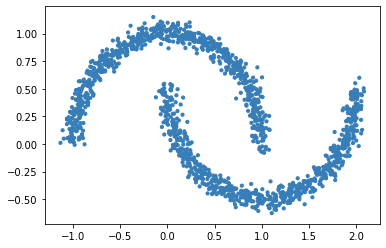

Adjusted Rand Index 0.0
Mutual Information 0.0


ValueError: ignored

In [0]:
from sklearn.cluster import DBSCAN
import numpy as np
model= DBSCAN(eps=0.5, min_samples=5)
model.fit_predict(X)
y_pred=model.labels_.astype(np.int)
print(y_pred)


###################################################################
#Visualization
###################################################################
import matplotlib.pyplot as plt
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()

###################################################################
#Evaluation
###################################################################
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
from sklearn import metrics

#Externals Index
ARI=adjusted_rand_score(y, y_pred)
print("Adjusted Rand Index", ARI)
#Mutual Information
mi=adjusted_mutual_info_score(y, y_pred)
print("Mutual Information",mi)

#Internal Index
#Silhoutte Coefficient
sil=metrics.silhouette_score(X, y_pred)
print("Silhouette Index",sil)
#Davis Boulding
db=metrics.davies_bouldin_score(X, y_pred)
print("Davis Boulding Index",db)


Algorithm 3: Agglomerative

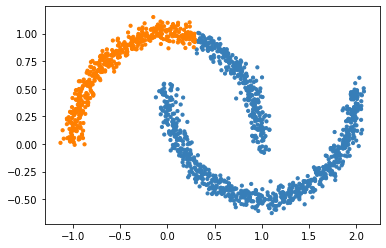

Adjusted Rand Index 0.35644740017364135
Mutual Information 0.41830047097634576
Silhouette Index 0.4444348809561705
Davis Boulding Index 0.7500787639840741


In [0]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

######################################################
#Dendrogram visulization function
######################################################
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(n_clusters=2)
model = model.fit(X)
y_pred=model.labels_.astype(np.int)
print(y_pred)

###################################################################
#Visualization
###################################################################
import matplotlib.pyplot as plt
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()

###################################################################
#Evaluation
###################################################################
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
from sklearn import metrics

#Externals Index
ARI=adjusted_rand_score(y, y_pred)
print("Adjusted Rand Index", ARI)
#Mutual Information
mi=adjusted_mutual_info_score(y, y_pred)
print("Mutual Information",mi)

#Internal Index
#Silhoutte Coefficient
sil=metrics.silhouette_score(X, y_pred)
print("Silhouette Index",sil)
#Davis Boulding
db=metrics.davies_bouldin_score(X, y_pred)
print("Davis Boulding Index",db)

#plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode='level', p=3)
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.show()